# Analyse du marché des véhicules électriques aux Etats-Unis

## Objectif

#### L'objectif  est d'étudier le marché des véhicules électriques aux Etats-Unis. Pour cela, nous allons analyser les données de la population des véhicules électriques aux Etats-Unis et prendre des décisions éclairées sur les tendances du marché.


#### Importation des bibliothèques nécessaires à notre analyse

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


#### Importation des données

In [61]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


#### Analyse des données

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [63]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [64]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [65]:
df.shape

(177866, 17)

In [66]:
df = df.dropna()

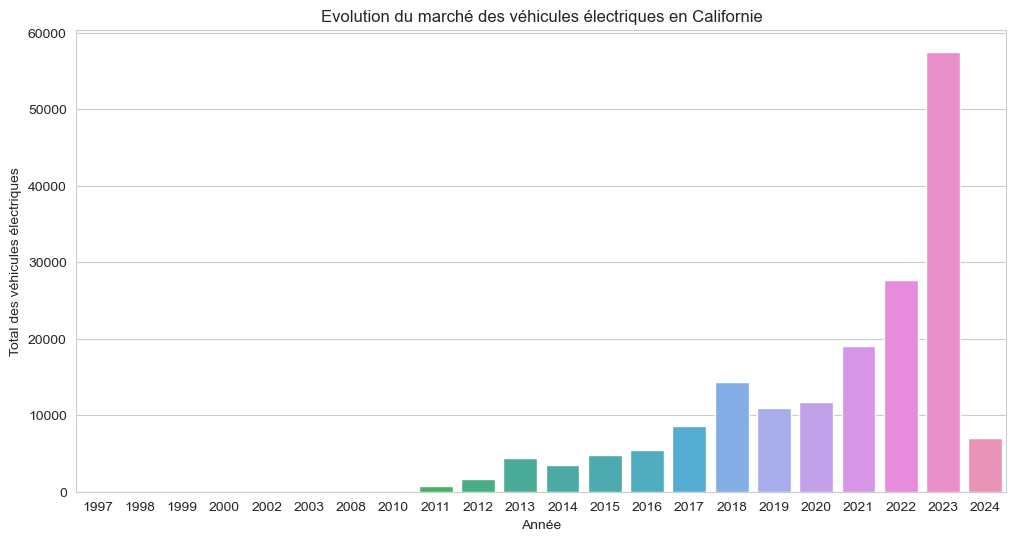

In [67]:
sns.set_style('whitegrid')

# EV Adoption Over Time
plt.figure(figsize=(12,6))
sns.countplot(x='Model Year', data=df)
plt.title('Evolution du marché des véhicules électriques en Californie')
plt.xlabel('Année')
plt.ylabel('Total des véhicules électriques')
plt.show()

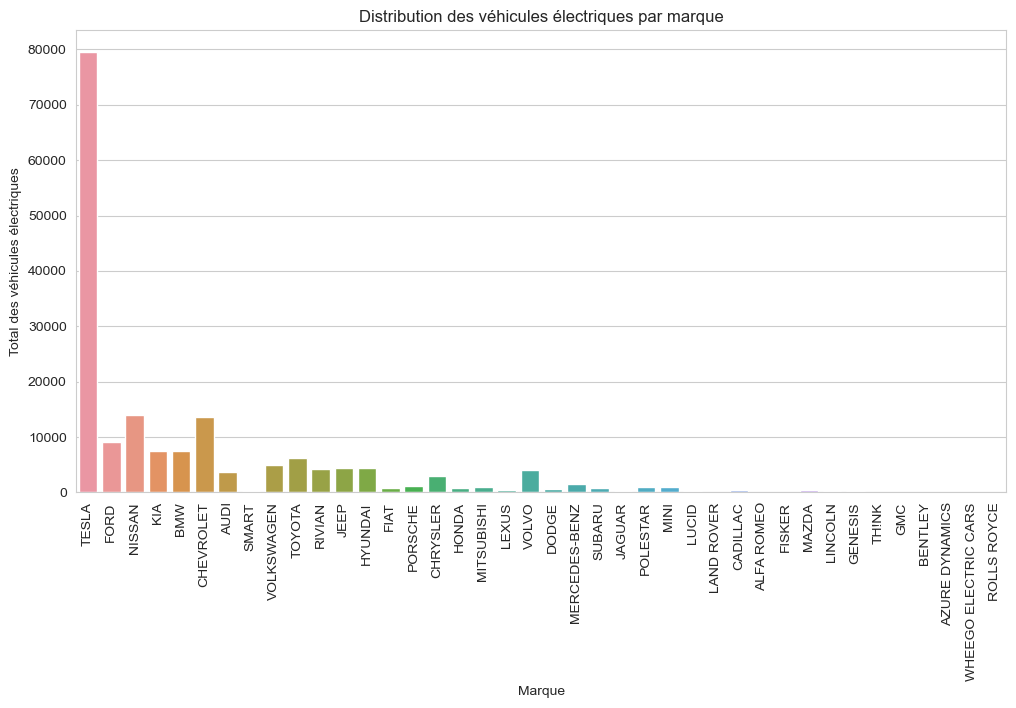

In [68]:
#### Distribution des véhicules électriques par marque
plt.figure(figsize=(12,6))
sns.countplot(x='Make', data=df)
plt.title('Distribution des véhicules électriques par marque')
plt.xlabel('Marque')
plt.ylabel('Total des véhicules électriques')
plt.xticks(rotation=90)
plt.show()

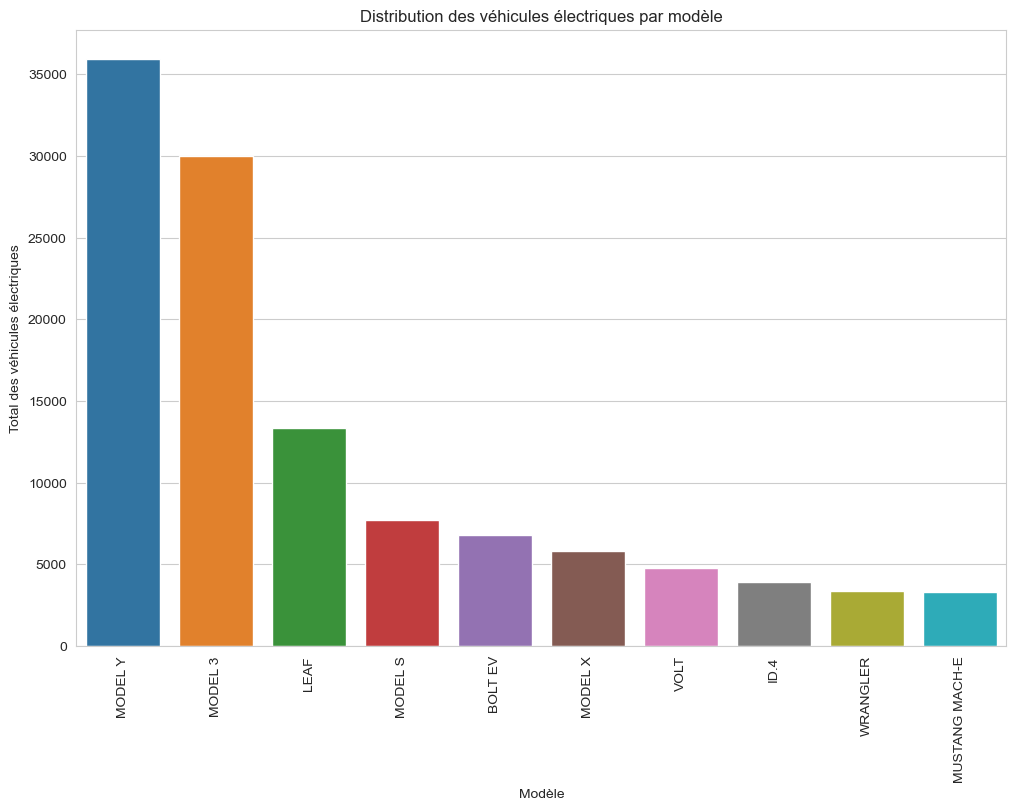

In [69]:
# Distribution des 10 véhicules électriques par modèle
plt.figure(figsize=(12,8))
sns.countplot(x='Model', data=df, order=df['Model'].value_counts().head(10).index)
plt.title('Distribution des véhicules électriques par modèle')
plt.xlabel('Modèle')
plt.ylabel('Total des véhicules électriques')
plt.xticks(rotation=90)
plt.show()

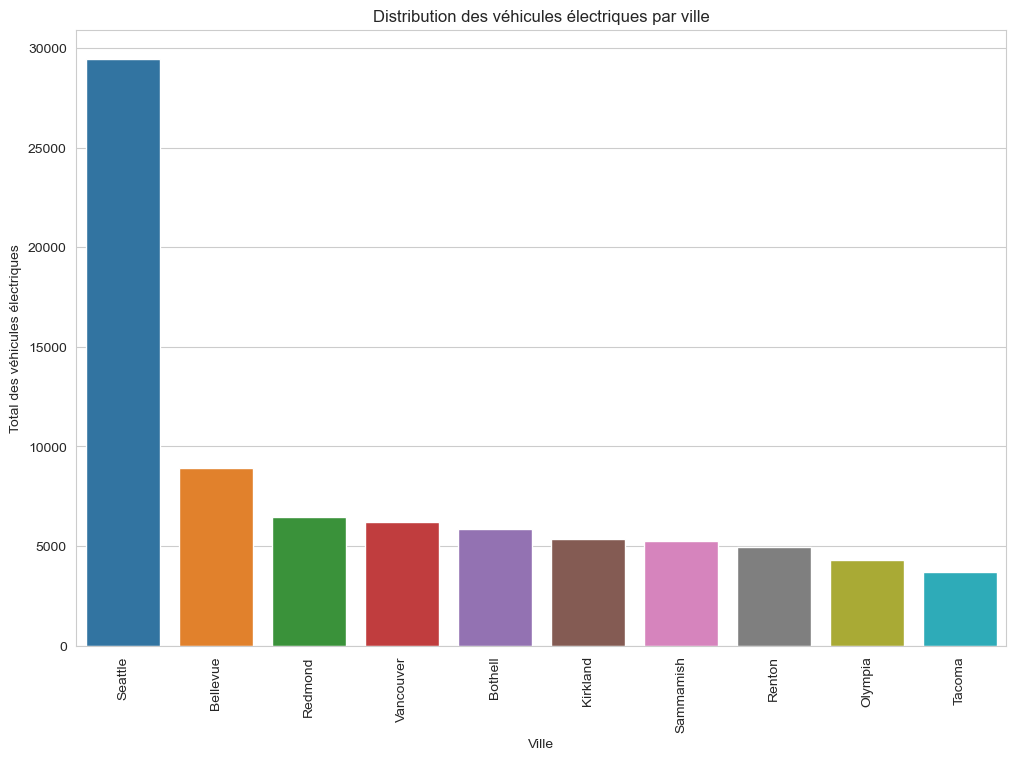

In [70]:
# Distribution des 10 villes des véhicules électriques  
plt.figure(figsize=(12,8))
sns.countplot(x='City', data=df, order=df['City'].value_counts().head(10).index)
plt.title('Distribution des véhicules électriques par ville')
plt.xlabel('Ville')
plt.ylabel('Total des véhicules électriques')
plt.xticks(rotation=90)
plt.show()

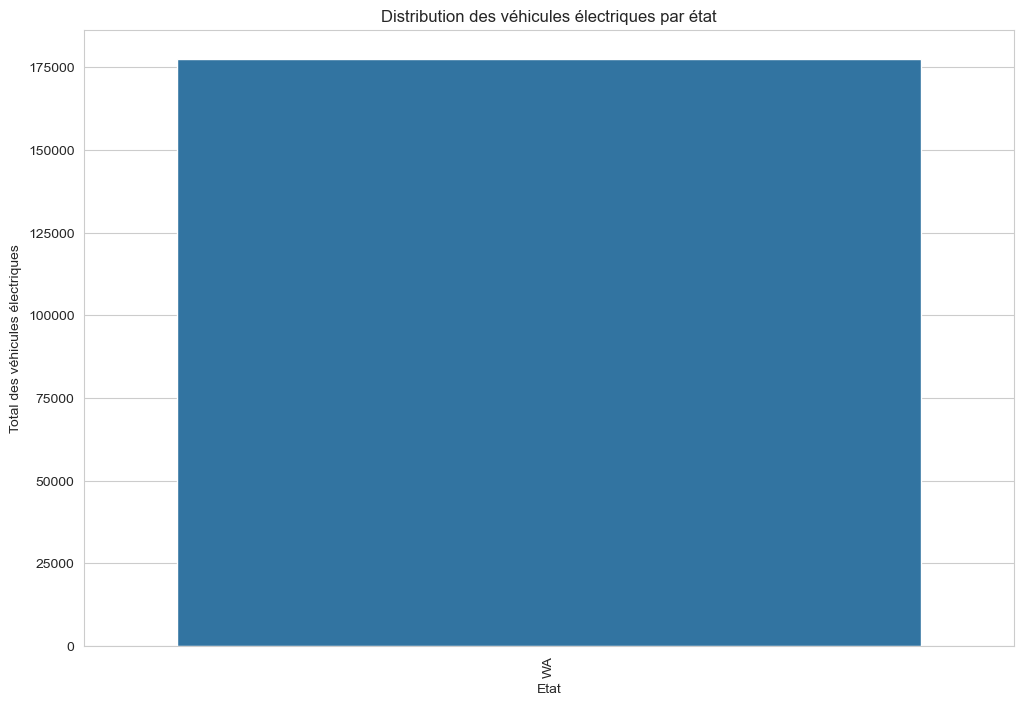

In [71]:
# Distribution des véhicules électriques par état
plt.figure(figsize=(12,8))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.title('Distribution des véhicules électriques par état')
plt.xlabel('Etat')
plt.ylabel('Total des véhicules électriques')
plt.xticks(rotation=90)
plt.show()

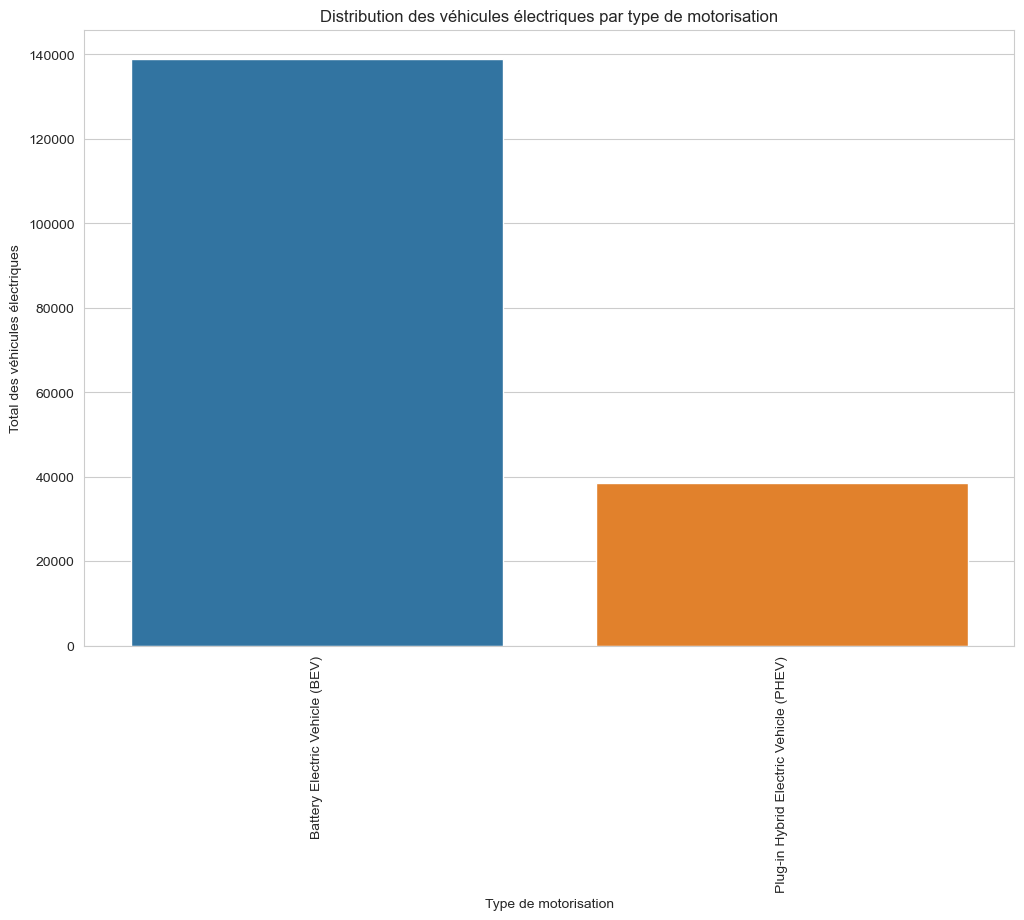

In [72]:
# Distribution des véhicules électriques par type de motorisation
plt.figure(figsize=(12,8))
sns.countplot(x='Electric Vehicle Type', data=df, order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Distribution des véhicules électriques par type de motorisation')
plt.xlabel('Type de motorisation')
plt.ylabel('Total des véhicules électriques')
plt.xticks(rotation=90)
plt.show()

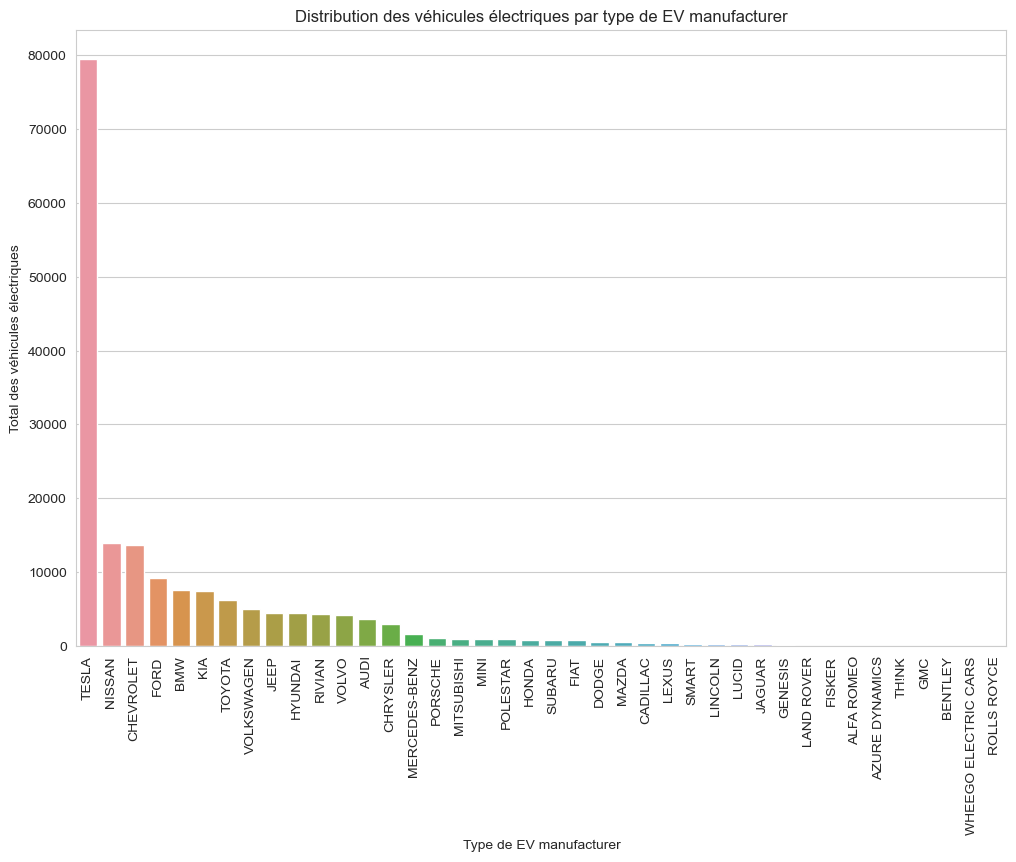

In [73]:
# Distribution des véhicules électriques par type de EV manufacturer
plt.figure(figsize=(12,8))
sns.countplot(x='Make', data=df, order=df['Make'].value_counts().index)
plt.title('Distribution des véhicules électriques par type de EV manufacturer')
plt.xlabel('Type de EV manufacturer')
plt.ylabel('Total des véhicules électriques')
plt.xticks(rotation=90)
plt.show()


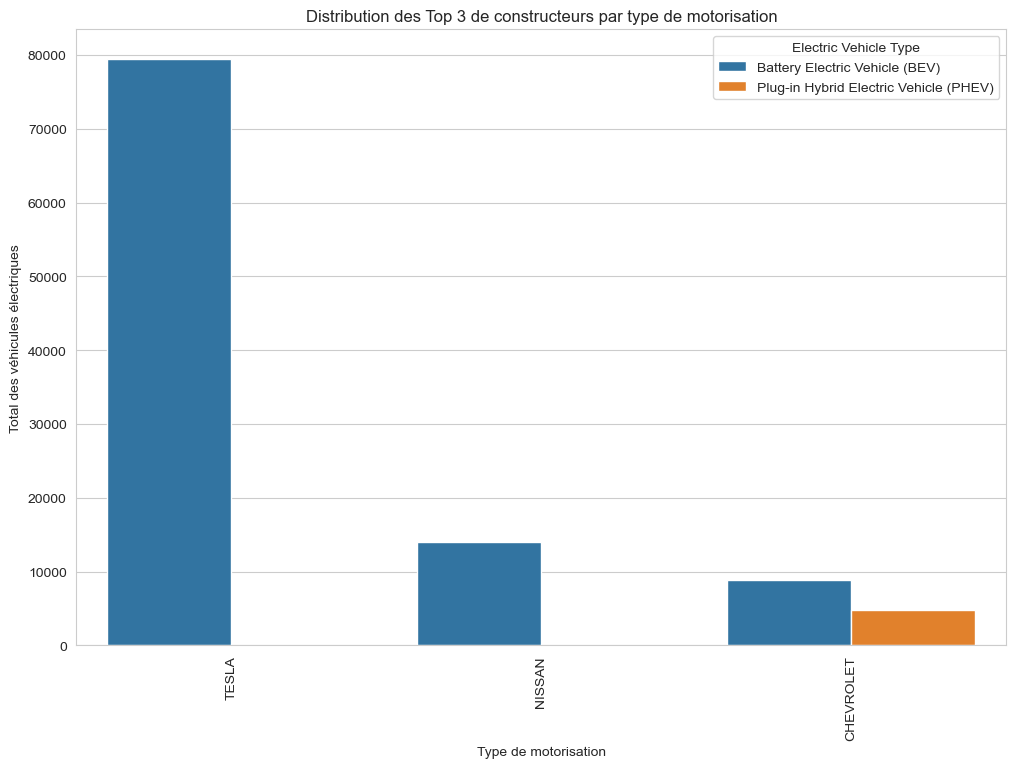

In [76]:
# Distribution des Top 3 de constructeurs 
top_3 = df['Make'].value_counts().head(3).index
df_top_3 = df[df['Make'].isin(top_3)]

plt.figure(figsize=(12,8))
sns.countplot(x='Make', data=df_top_3, hue='Electric Vehicle Type')
plt.title('Distribution des Top 3 de constructeurs par type de motorisation')
plt.xlabel('Type de motorisation')
plt.ylabel('Total des véhicules électriques')
plt.xticks(rotation=90)
plt.show()


/Users/mohamedkeita/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


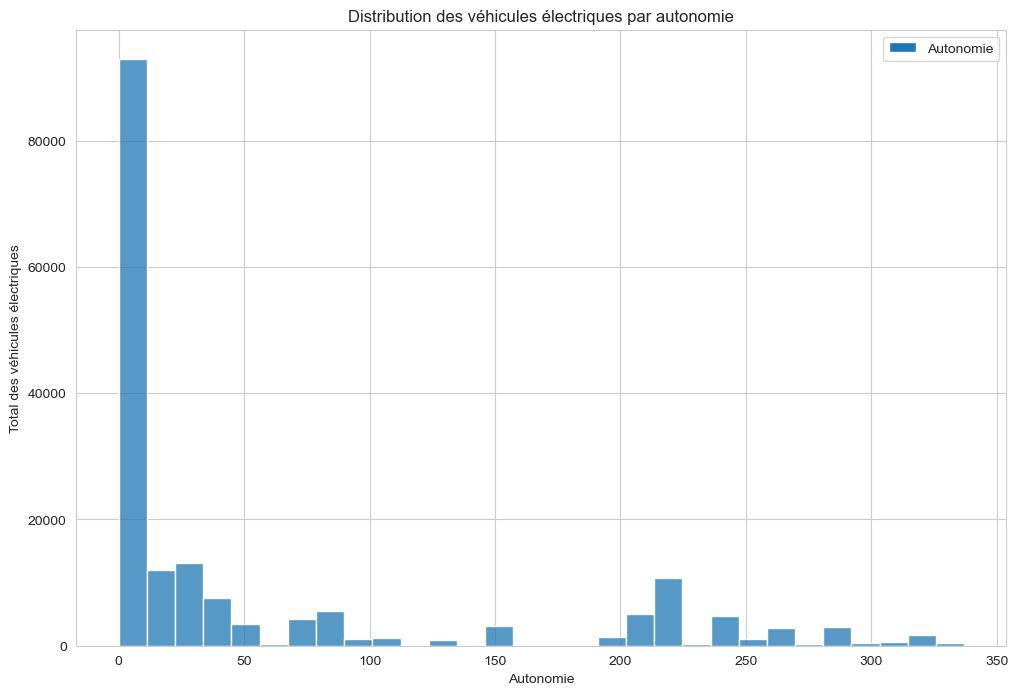

In [80]:
# Analyse des véhicules par autonomie
plt.figure(figsize=(12,8))
sns.histplot(df['Electric Range'], bins=30, kde=False)
plt.title('Distribution des véhicules électriques par autonomie')
plt.xlabel('Autonomie')
plt.ylabel('Total des véhicules électriques')
plt.legend(['Autonomie'])
plt.show()

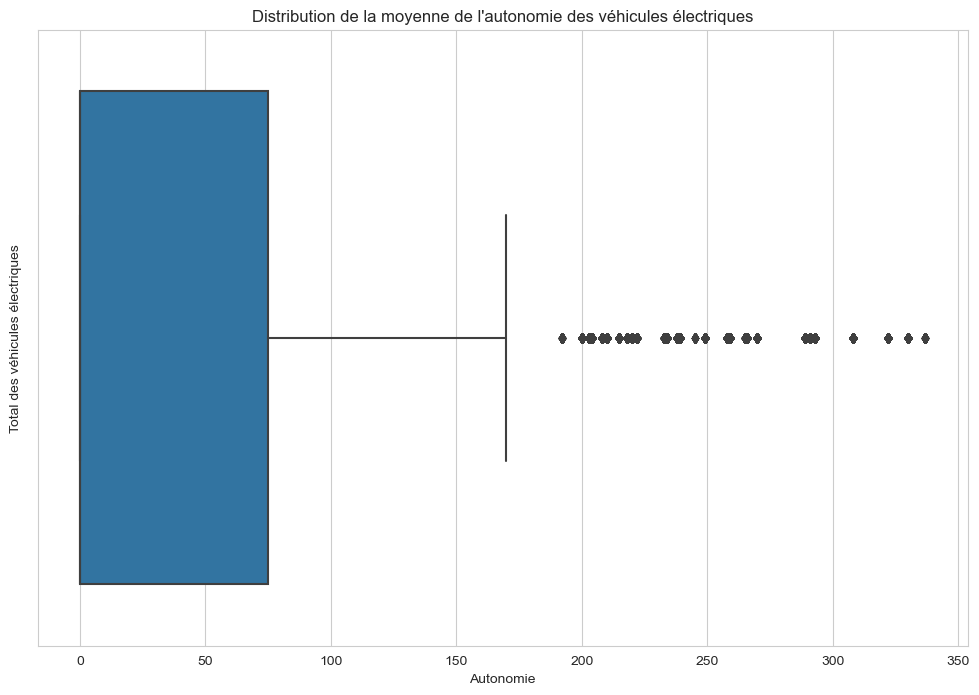

In [82]:
# Estimation de la moyenne de l'autonomie des véhicules électriques
df['Electric Range'].mean()

# Visualisation de la distribution de la mpyenne de l'autonomie des véhicules électriques
plt.figure(figsize=(12,8))
sns.boxplot(x='Electric Range', data=df)
plt.title('Distribution de la moyenne de l\'autonomie des véhicules électriques')
plt.xlabel('Autonomie')
plt.ylabel('Total des véhicules électriques')
plt.show()

/Users/mohamedkeita/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mohamedkeita/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


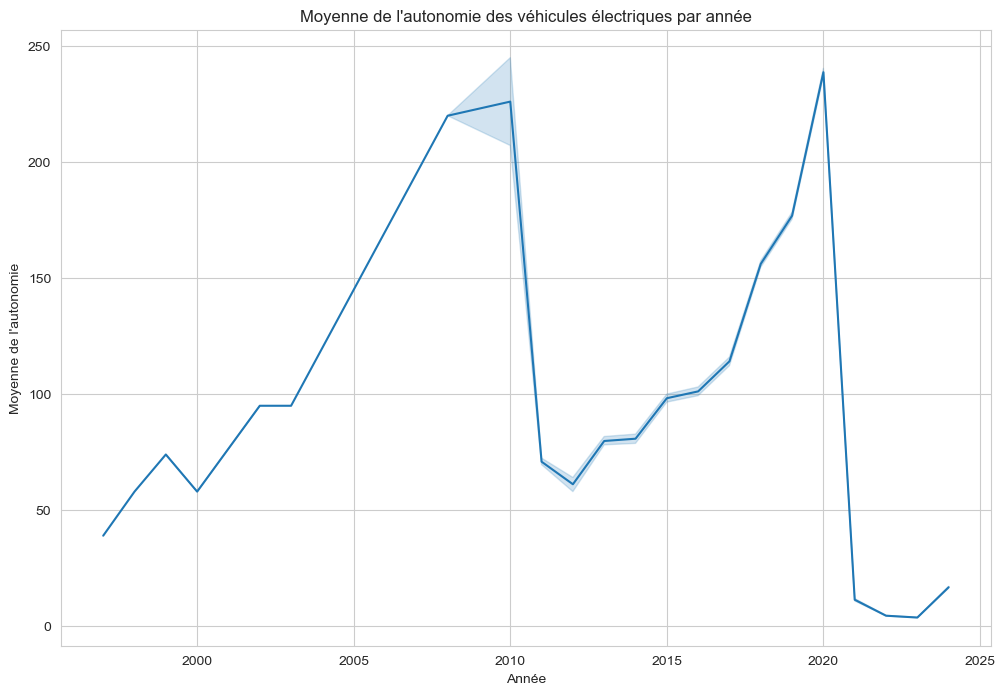

In [83]:
# calculating the average electric range by model year
df.groupby('Model Year')['Electric Range'].mean()
# Visualisation de la moyenne de l'autonomie des véhicules électriques par année
plt.figure(figsize=(12,8))
sns.lineplot(x='Model Year', y='Electric Range', data=df)
plt.title('Moyenne de l\'autonomie des véhicules électriques par année')
plt.xlabel('Année')
plt.ylabel('Moyenne de l\'autonomie')
plt.show()

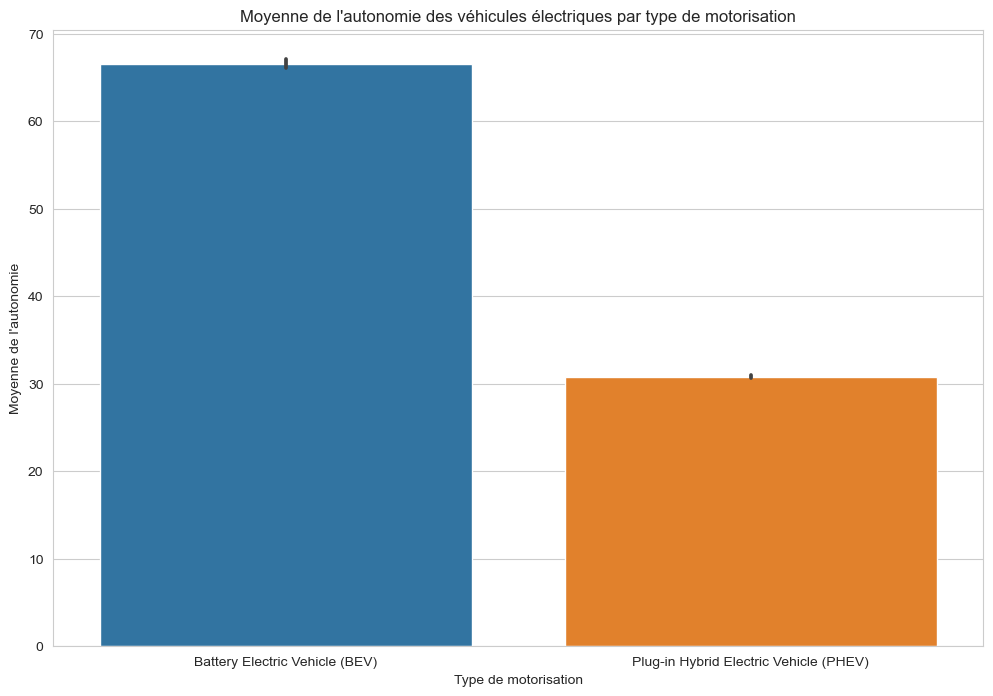

In [84]:
# Estimation de la moyenne de l'autonomie des véhicules électriques par type de motorisation
df.groupby('Electric Vehicle Type')['Electric Range'].mean()
# Visualisation de la moyenne de l'autonomie des véhicules électriques par type de motorisation
plt.figure(figsize=(12,8))
sns.barplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Moyenne de l\'autonomie des véhicules électriques par type de motorisation')
plt.xlabel('Type de motorisation')
plt.ylabel('Moyenne de l\'autonomie')
plt.show()

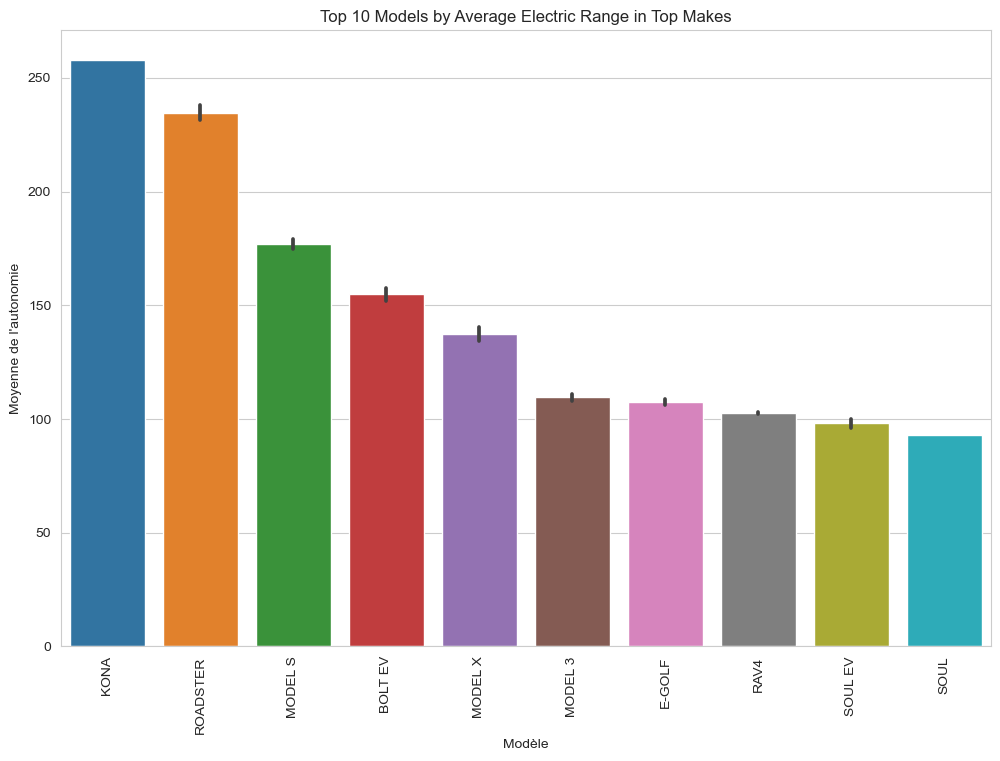

In [85]:
# Top 10 Models by Average Electric Range in Top Makes
top_10_makes = df['Make'].value_counts().head(10).index
df_top_10_makes = df[df['Make'].isin(top_10_makes)]
df_top_10_makes.groupby('Model')['Electric Range'].mean().sort_values(ascending=False).head(10)
# Visualisation des 10 meilleurs modèles par moyenne d'autonomie
plt.figure(figsize=(12,8))
sns.barplot(x='Model', y='Electric Range', data=df_top_10_makes, order=df_top_10_makes.groupby('Model')['Electric Range'].mean().sort_values(ascending=False).head(10).index)
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Modèle')
plt.ylabel('Moyenne de l\'autonomie')
plt.xticks(rotation=90)
plt.show()

In [89]:
# Calcul du total de véhicules électriques par année
df['Model Year'].value_counts()


Model Year
2023    57519
2022    27708
2021    19063
2018    14286
2020    11740
2019    10913
2017     8534
2024     7072
2016     5469
2015     4826
2013     4399
2014     3496
2012     1614
2011      775
2010       23
2008       19
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64